<a href="https://colab.research.google.com/github/shabarie11/Billz/blob/main/Copy_of_Easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Import Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
# to manipulate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split data into train and test
from sklearn.model_selection import train_test_split

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# to create extreme gradient boosting
from xgboost import XGBClassifier


# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune  models
from sklearn.model_selection import GridSearchCV


#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

**Understanding the Structure of Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')

In [4]:
#Check the Dataset Shape

df.shape

(25480, 12)

In [5]:
#View top 5 data's

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
#Statistical summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [7]:
#Statistical Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
#Find the Suplicate values

df.duplicated().sum()

0

In [9]:
#Check null values

df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Obervations:**

The dataset has 25480 rows and 12 columns

There are no missing values in the dataset

There are no duplicate values in the dataset

no_of_employees, yr_of_estab, and prevailing_wage are numeric features while rest are objects

the no of employees has a mean of 5,667 and median of 2,109. This indicates that the distribution is skewed

there are negative values in the no of employees which could be an error

yr of estab ranges from 1800 to 2016

prevailing wage ranges from 2 to 319,210 and distribution is skewed

The most popular continent is Asia

The most popular educational level is Bachelor

**# Exploratory Data Analysis**

**Univariate Analysis**

In [10]:
# for numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

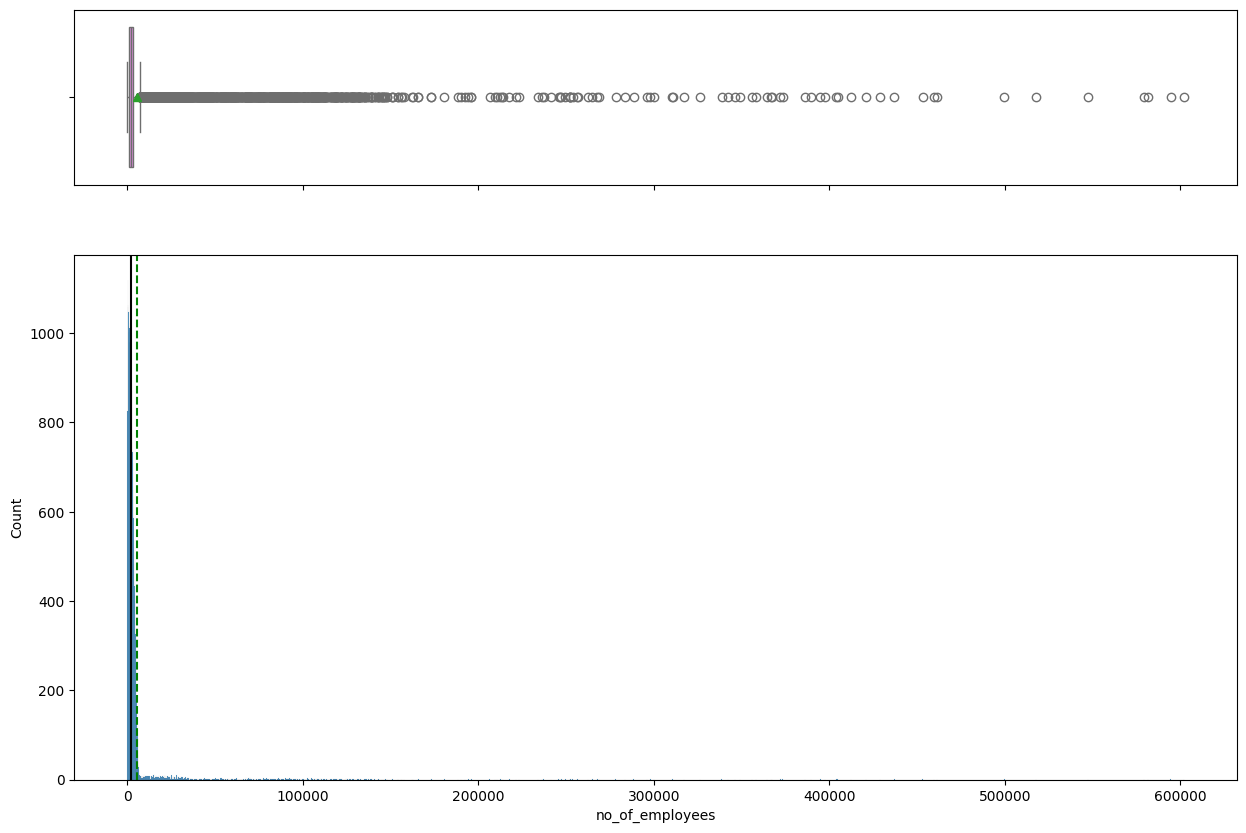

In [12]:
# Observations on number of employees
histogram_boxplot(df,'no_of_employees')

**Obervations:**

The distribution of the number of workers is highly skewed to the right.

This suggests that the dataset includes small businesses, mid-sized firms, and large multinational corporations.

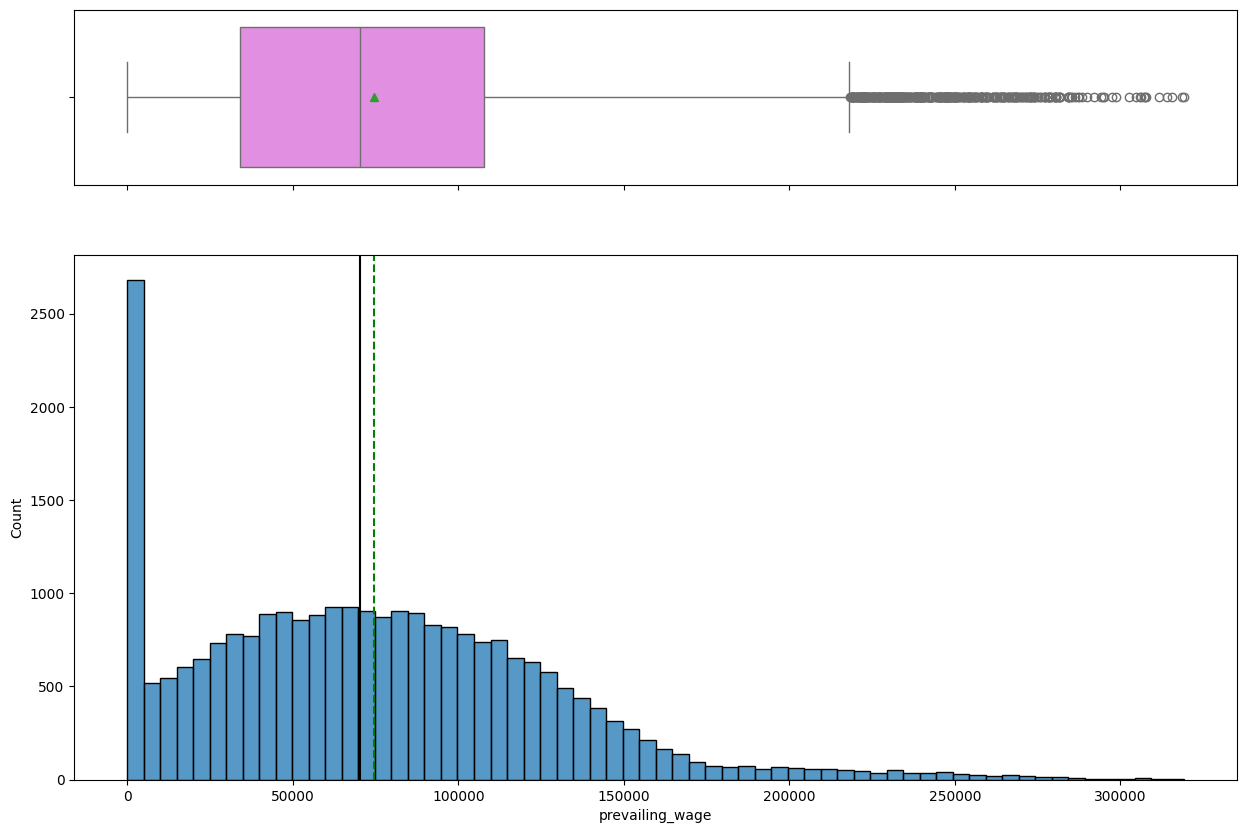

In [13]:
#Observations on prevailing wage
histogram_boxplot(df,'prevailing_wage')

**Obervations:**

The distribution of the prevailing wage is right-skewed.

There is a significant disparity in the wages of applicants.

Some applicants have a wage exceeding 150,000.

There is a considerable number of applicants with a wage close to 0, which may require further investigation.

It's possible that some wages are recorded on an hourly basis, while others on an annual basis.

In [14]:
df.loc[df['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

,count
unit_of_wage,
Hour,176


Obervations:

It appears that the lower wages are indeed calculated on an hourly basis.

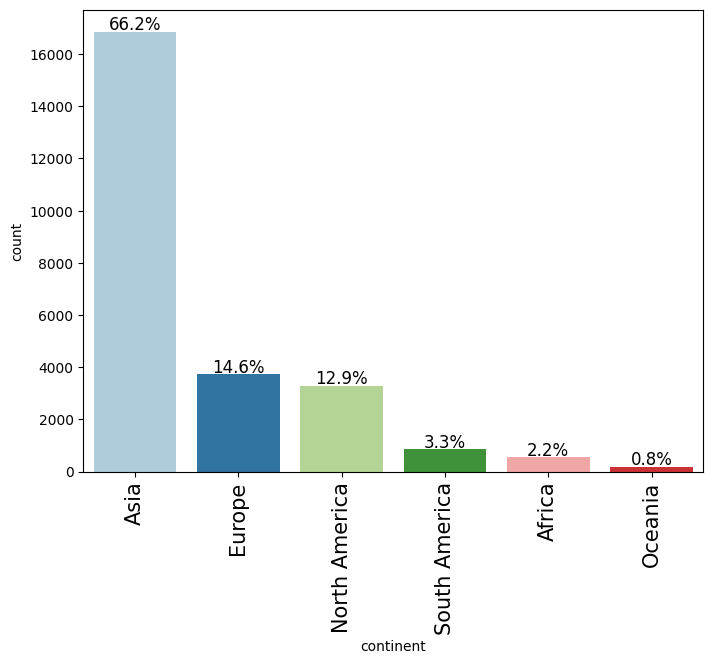

In [15]:
#Observations on continent

labeled_barplot(df, "continent", perc=True)

**Obervations**:

66% are coming from Asia, 15% are coming from EU, and 13% are coming from North Amercia

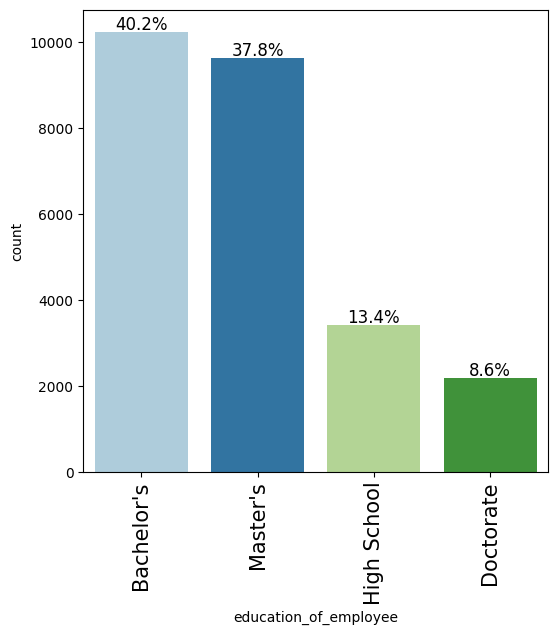

In [16]:
#Observations on education of employee

labeled_barplot(df, "education_of_employee", perc=True)

**Observations:**

40.2% of the candidates hold a bachelor's degree, while 37.8% possess a master's degree.

Moreover, 8.6% of the applicants have earned a doctorate degree.

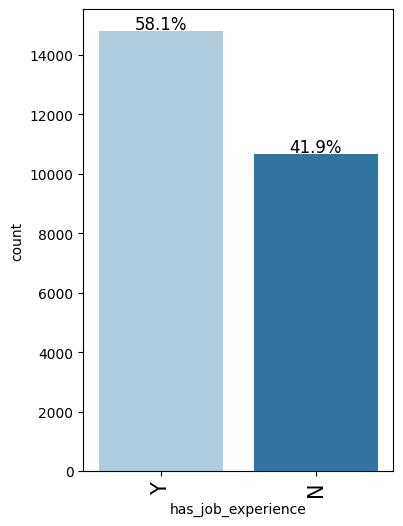

In [17]:
#Observations on job experienc

labeled_barplot(df, "has_job_experience", perc=True)

**Observations:**

- 58.1% of the candidates possess work experience.

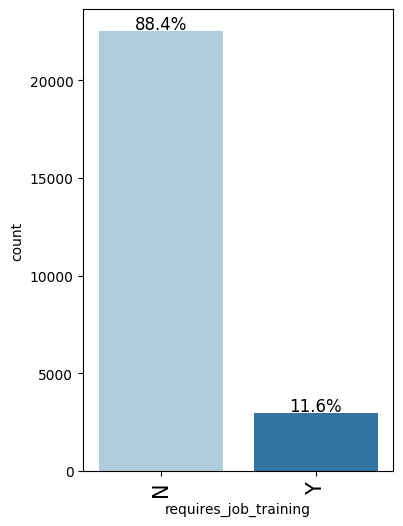

In [18]:
#Observations on job training

labeled_barplot(df, "requires_job_training", perc=True)

Observations:

- 88.4% of the applicants do not require any job training


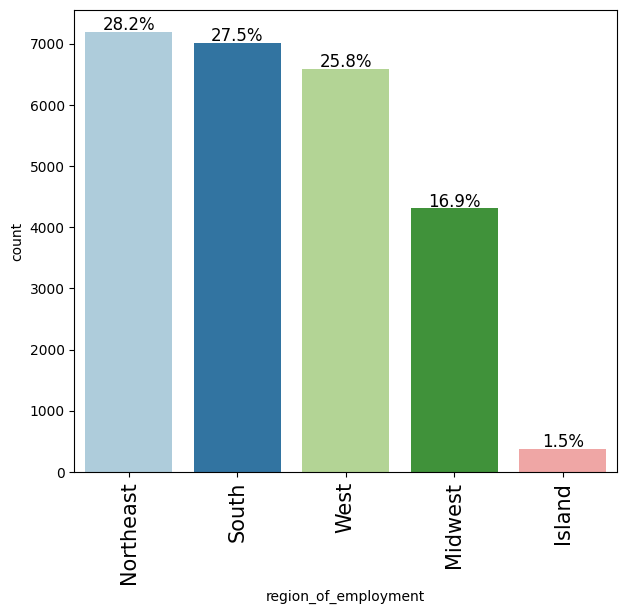

In [19]:
#Observations on region of employment

labeled_barplot(df, "region_of_employment", perc=True)

**Observations:**

The applicants from the Northeast, South, and West regions are equally represented. However, only 1.5% of the applicants are from the Island regions.

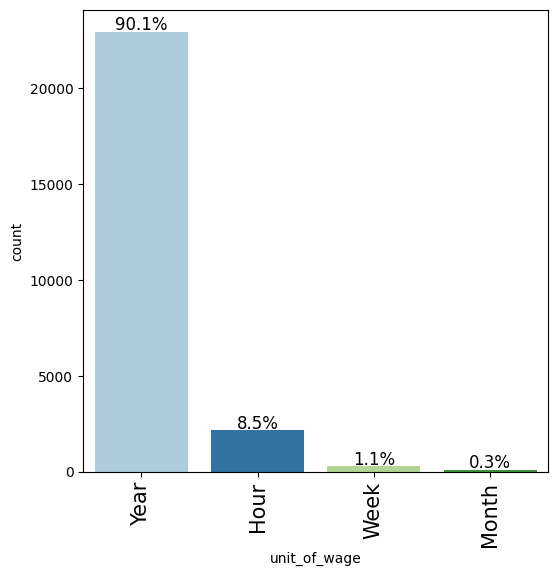

In [20]:
#Observations on unit of wage

labeled_barplot(df, "unit_of_wage", perc=True)

**Observations:**

90.1% of the applicants are paid on an annual basis.

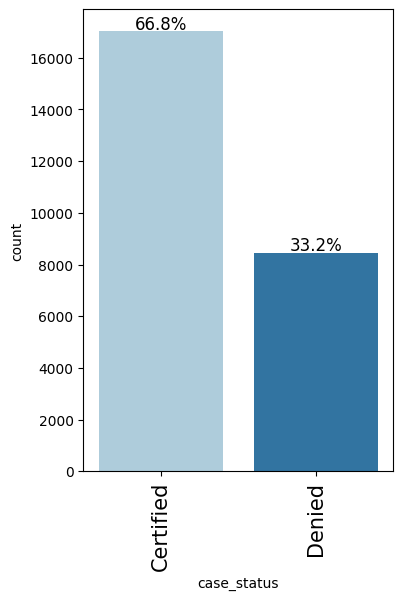

In [21]:
#Observations on case status

labeled_barplot(df, "case_status", perc=True)

**Observations:**

66.8% of the visa applications were certified.

**## Bivariate Analysis**

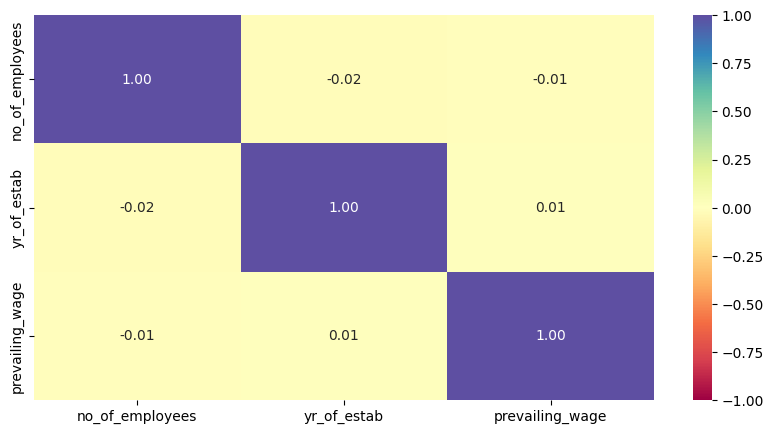

In [22]:
# seperate the numerical values
cols_list = df.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**

There is no observable correlation between the numerical variables.

In [23]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [24]:
# function to create labeled barplots
def lable_barplot(df, x, y, order ,perc=False, n=None):
  total = len(df[x])
  count = df[x].nunique()
  if n is None:
    plt.figure(figsize=(count + 1, 5))
  else:
    plt.figure(figsize=(n + 1, 5))

  ax = sns.countplot(data=df, x=x, order = order, palette='viridis', hue=y)

  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(100 * p.get_height()/ total)
    else:
      label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(label, (x, y), ha='center', va='center', size=9, xytext=(0, 5), textcoords='offset points')
  plt.show()

In [25]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


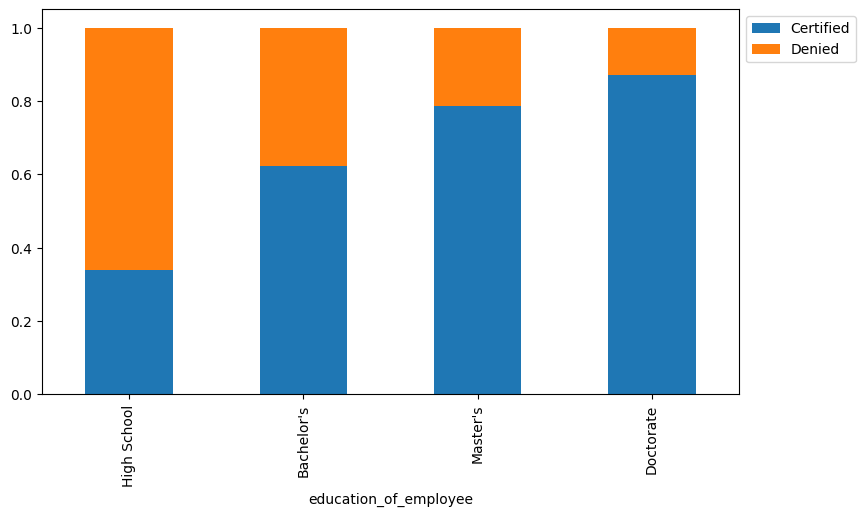

In [26]:
#Education vs case status
stacked_barplot(df, "education_of_employee", "case_status")

**Observations:**

The data suggests that applicants with higher levels of education have a higher chance of getting their visas certified.

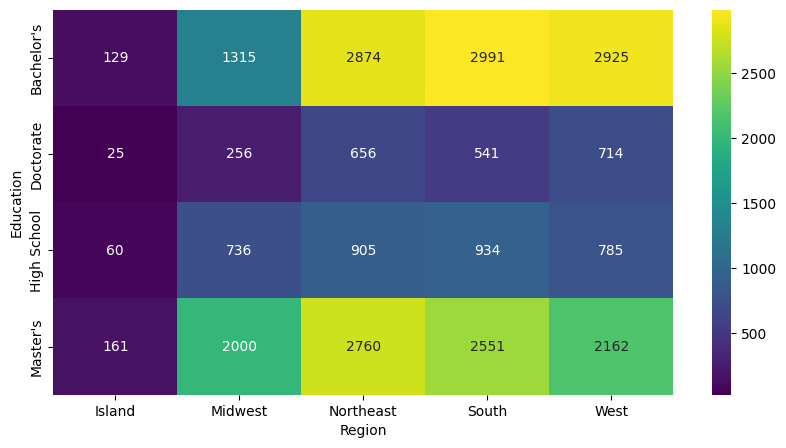

In [27]:
#Educcation vs Region

plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Observations:**

The data indicates regional trends in educational requirements for applicants. For those with a high school diploma, the highest demand is in the South region, followed by the Northeast.

For applicants with a Bachelor's degree, the South region again shows the highest demand, but this time followed by the West.

Those with a Master's degree are most in demand in the Northeast region, with the South coming in second. Finally, for those with a Doctorate degree, the West region shows the highest demand, closely followed by the Northeast.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


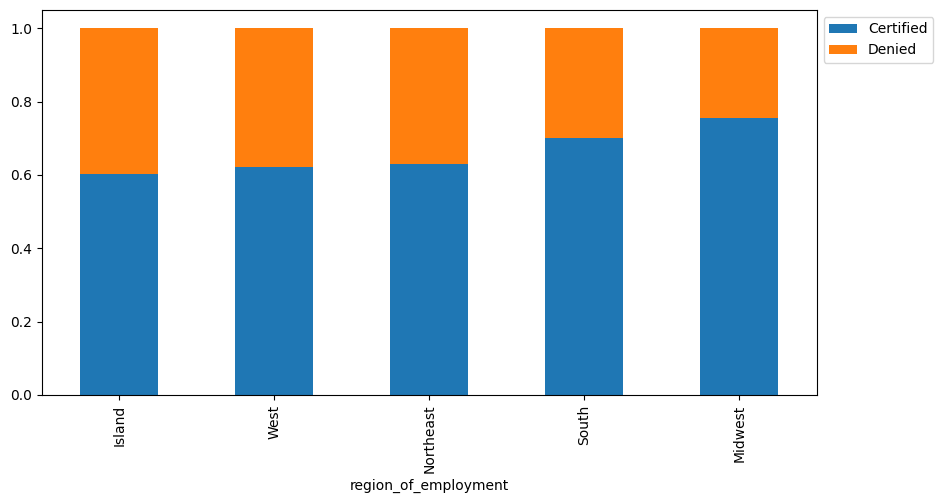

In [28]:
#Region vs Case Status

stacked_barplot(df, "region_of_employment", "case_status")

**Observations:**

The data suggests that applicants from the Midwest region have the highest chances of receiving positive outcomes in their cases. Conversely, applicants from the Island region appear to have the lowest chances of positive outcomes.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


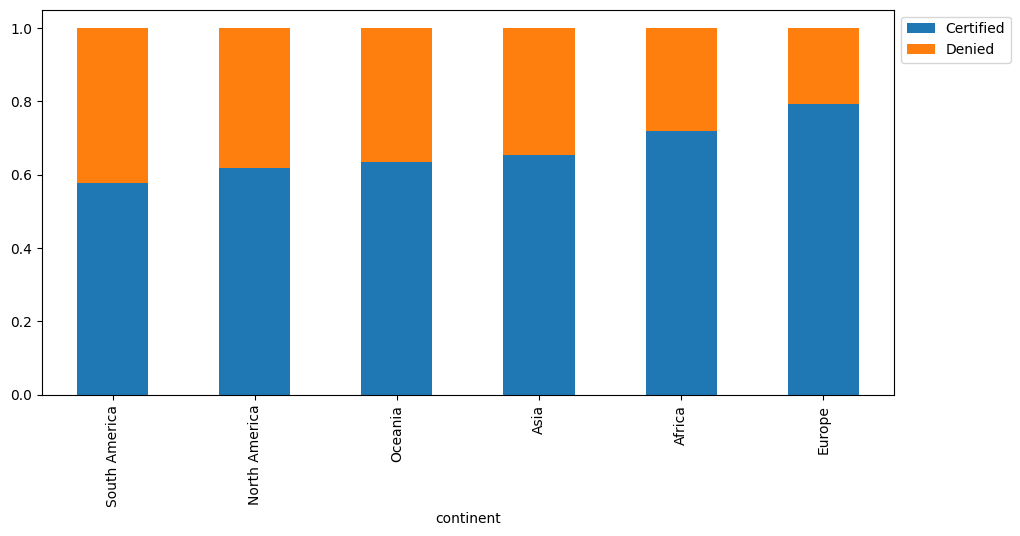

In [29]:
#Continent vs Case Status

stacked_barplot(df, "continent", "case_status")

**Observations:**

The data indicates that applicants from the European Union (EU) have the highest likelihood of getting their visas certified. On the other hand, applicants from South America have the lowest likelihood of certification.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


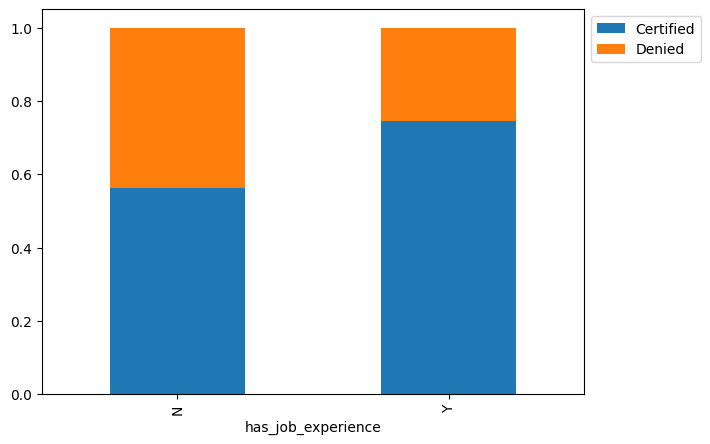

In [30]:
#Job Experience vs Case Status

stacked_barplot(df, "has_job_experience", "case_status")

**Observations:**

Applicants with job experience have more chances of getting certified

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


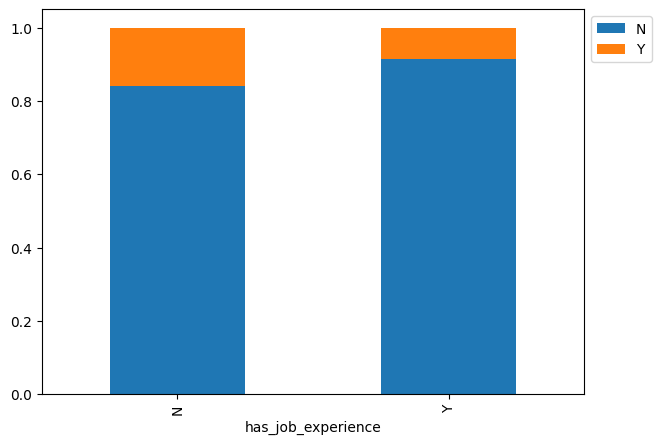

In [31]:
#Job Experience vs Training required

stacked_barplot(df, "has_job_experience", "requires_job_training")

**Observations:**

If the applicant has a job experience, they are less likely to require training

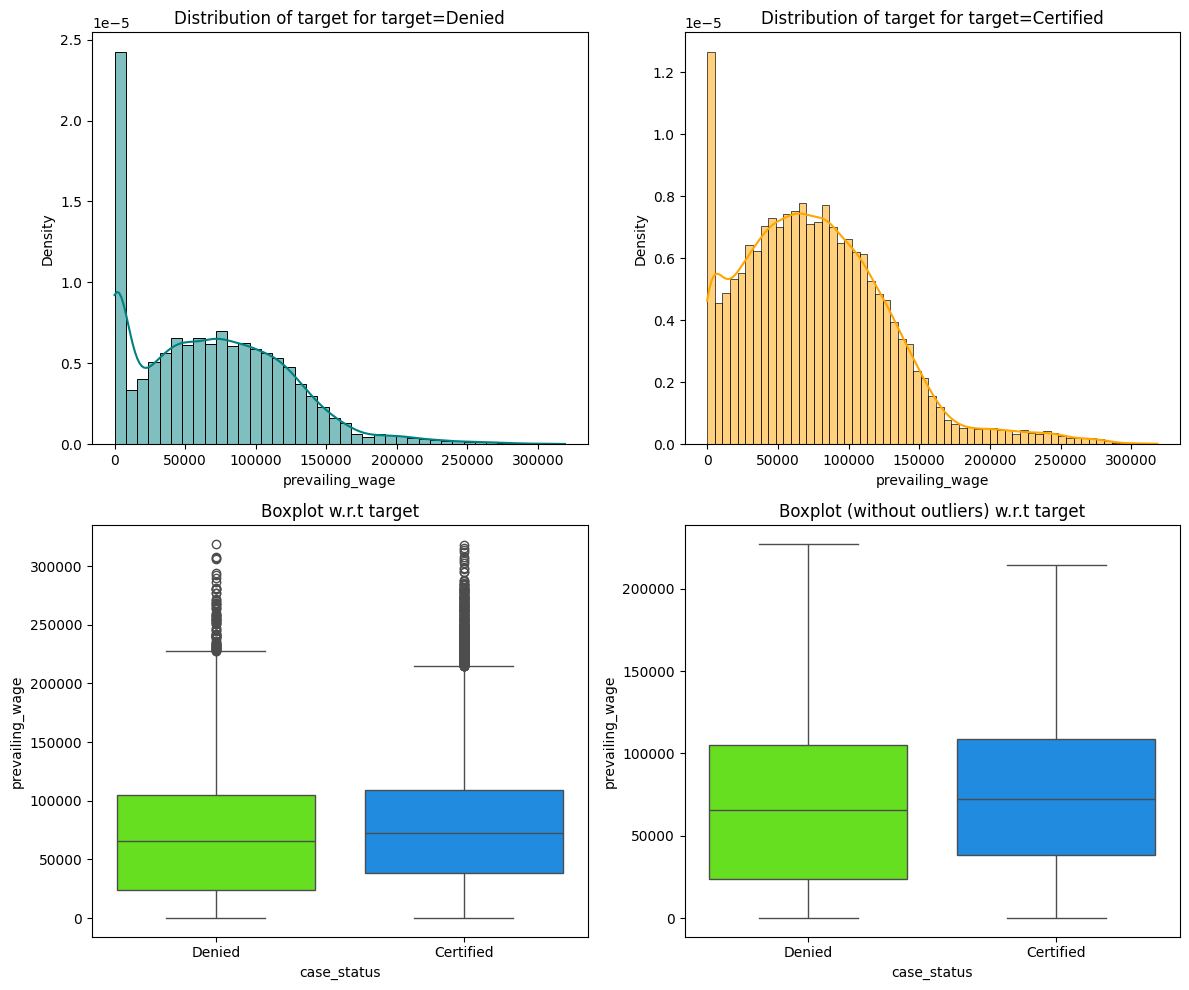

In [32]:
#Wage vs Case Status

distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

Observations:

This suggests that applications with higher prevailing wages are somewhat more likely to be certified compared to those with lower prevailing wages. It could indicate that higher-skilled positions, which typically offer higher wages, have a better chance of visa certification. However, this is an overall trend and does not guarantee that higher wages will always lead to certification.

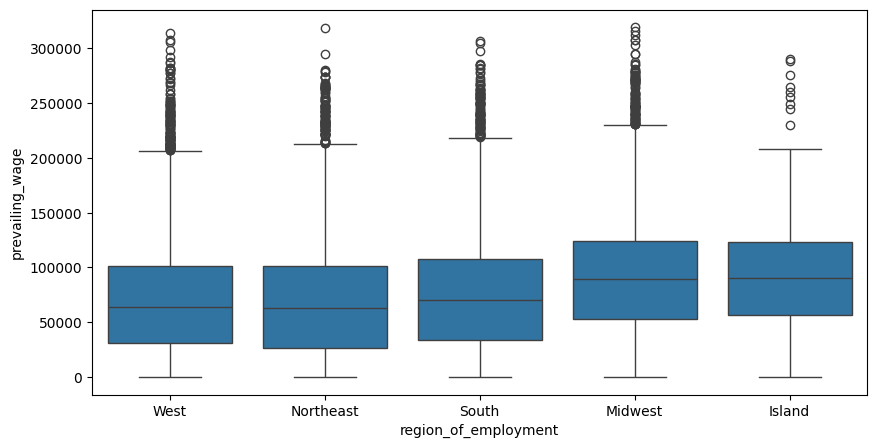

In [33]:
#Region vs Wage

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

Observations:

prevailing wages is higher in Midwest and Island

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?


In [34]:
df.groupby('education_of_employee')['case_status'].value_counts()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: count, dtype: int64

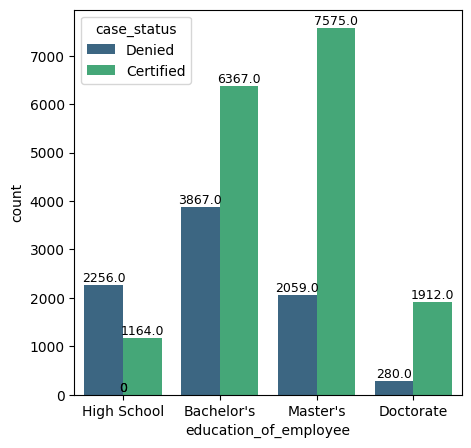

In [35]:
lable_barplot(df, 'education_of_employee', 'case_status', order=["High School", "Bachelor's", "Master's", "Doctorate"])

2. How does the visa status vary across different continents?


In [36]:
#group data by continent and count the numbers of each case_status for each category
df.groupby('continent')['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: count, dtype: int64

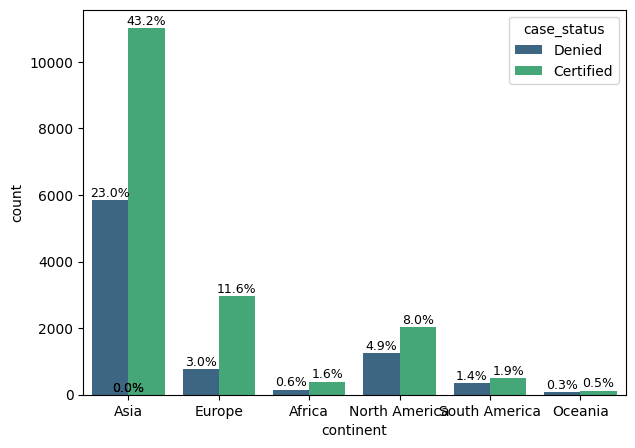

In [37]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
lable_barplot(df, 'continent', 'case_status', order=['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'], perc=True)

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [38]:
df.groupby('has_job_experience') ['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: count, dtype: int64

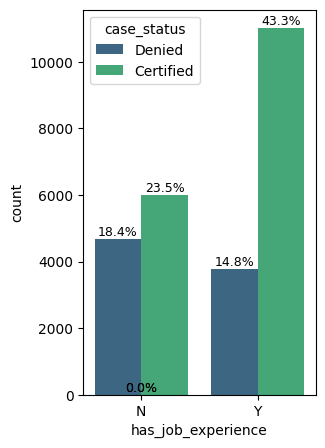

In [39]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
lable_barplot(df, 'has_job_experience', 'case_status', order=None, perc=True)

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [40]:
#group data by unit_of_wage and count the numbers of each case_status for each category
df.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: count, dtype: int64

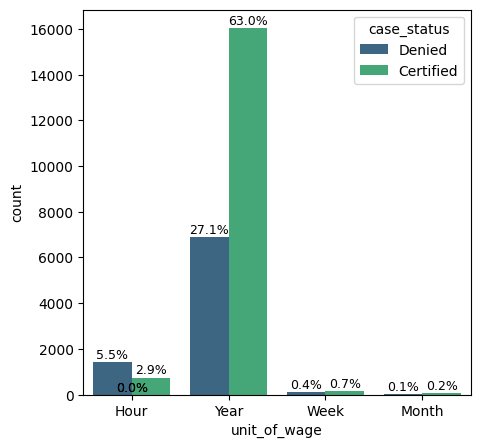

In [41]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
lable_barplot(df, 'unit_of_wage', 'case_status', order=None, perc=True)

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [42]:
#group data by unit_of_wage and calculate the mean prevailing_wage for each category
df.groupby('unit_of_wage')['prevailing_wage'].mean()

,prevailing_wage
unit_of_wage,
Hour,414.570513
Month,87592.864045
Week,85606.820515
Year,81228.077133


In [43]:
#create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
df_hourly = df[df['unit_of_wage'] == 'Hour']

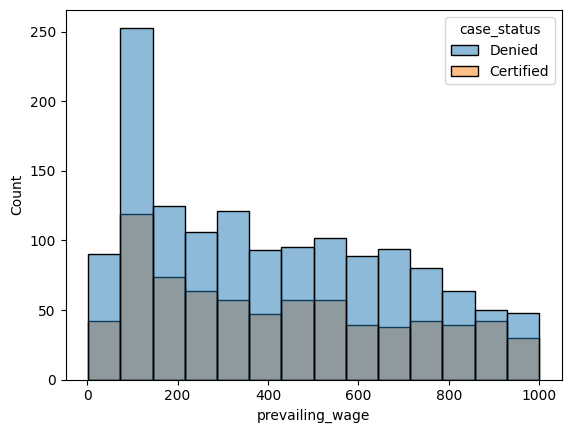

In [44]:
#show a distribution of the *prevailing_wage* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=df_hourly, x='prevailing_wage', hue='case_status')
plt.show()

**Data Preprocessing**

In [45]:
# Create a copy of data frame before preprocessing
df_1 = df.copy()

In [46]:
# Identify rows with non-positive no_of_employees
neg_employee_no_rows = df.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
df.loc[neg_employee_no_rows, "no_of_employees"] = df.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {df.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


**Outlier Check**

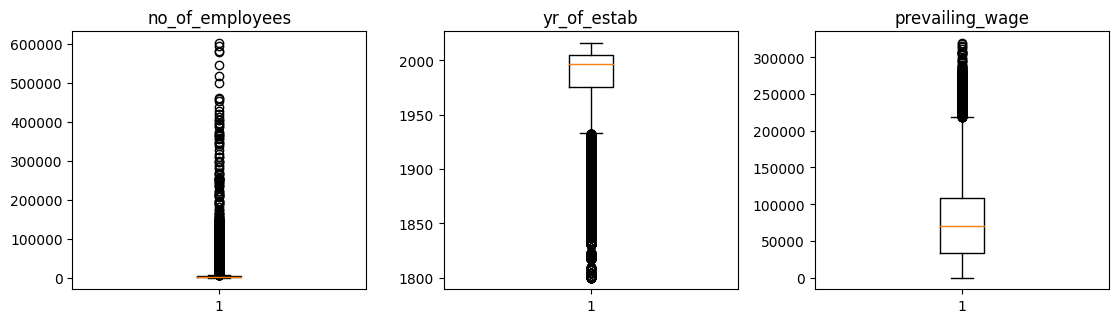

In [47]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Feature Engineering**

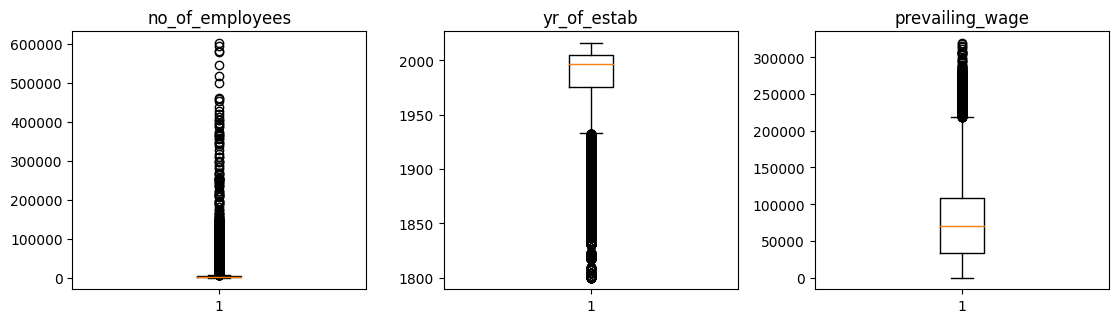

In [48]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Train-test split**

In [49]:
# encode case status, where certified is 1, denied is 0
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [50]:
# split to train and test
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

# create dummy varialbes for categories
X = pd.get_dummies(X, drop_first=True)

In [51]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 25500)
Shape of test set :  (7644, 25500)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


**Model Building - Bagging**

In [53]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree**

In [55]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

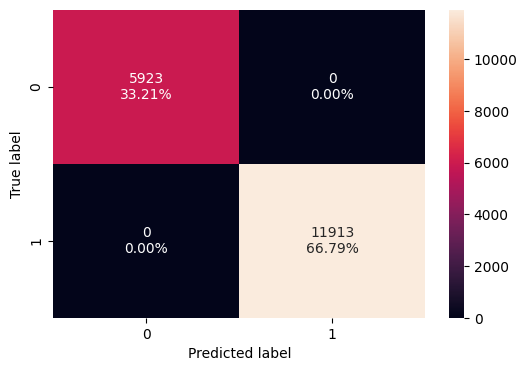

In [56]:
confusion_matrix_sklearn(model, X_train, y_train)

In [57]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


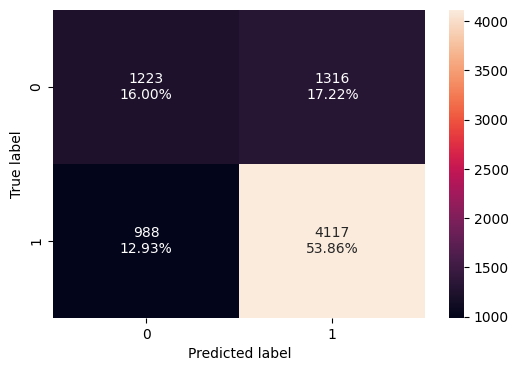

In [58]:
confusion_matrix_sklearn(model, X_test, y_test)

In [59]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.698587,0.806464,0.757777,0.781363


**Observations:**

The decision tree is overfitting

**Bagging**

In [60]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

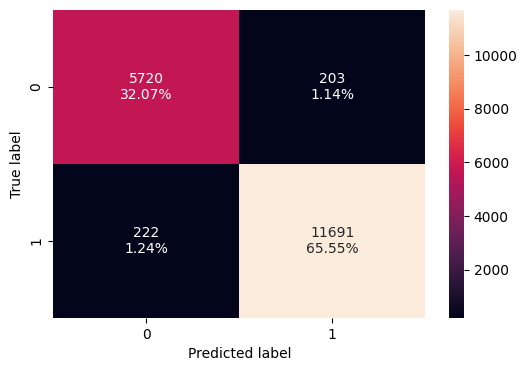

In [61]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [62]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.976172,0.981365,0.982933,0.982148


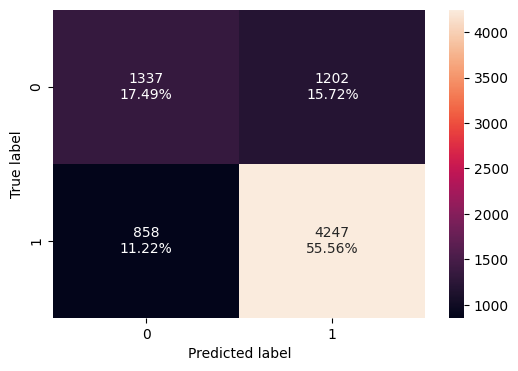

In [63]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [64]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.730508,0.831929,0.779409,0.804813


**Observations:**

The bagging classifier is also overfitting

**Random Forest**

In [65]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

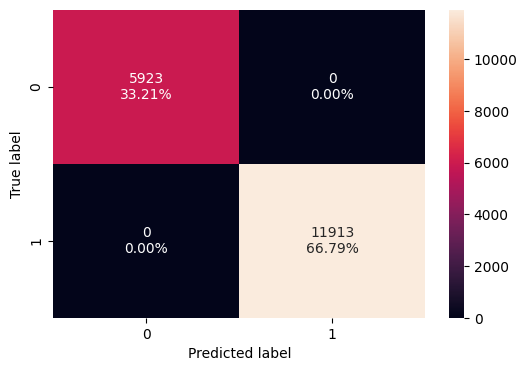

In [66]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [67]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


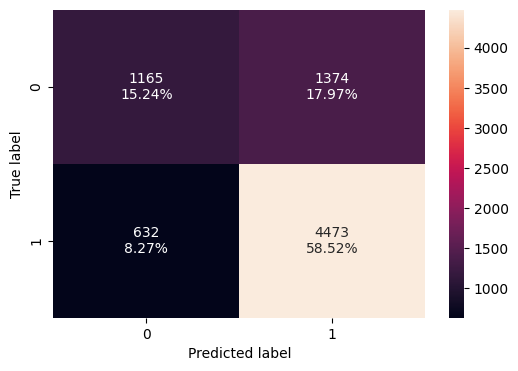

In [68]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [69]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.737572,0.8762,0.765008,0.816837


**Observations:**

Random forest is overfitting

In [71]:
import sys